<a href="https://colab.research.google.com/github/chenyujiedev/homeWorkOfML/blob/main/11%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


========== 과제 1 ==========
train_image[6000] 출력 중...


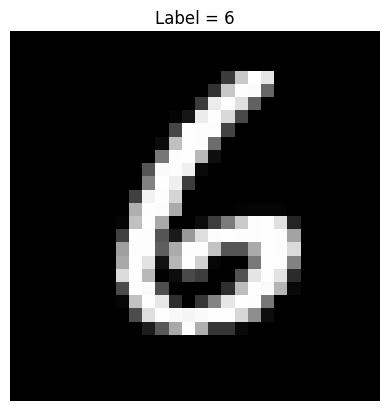


========== 과제 2 ==========


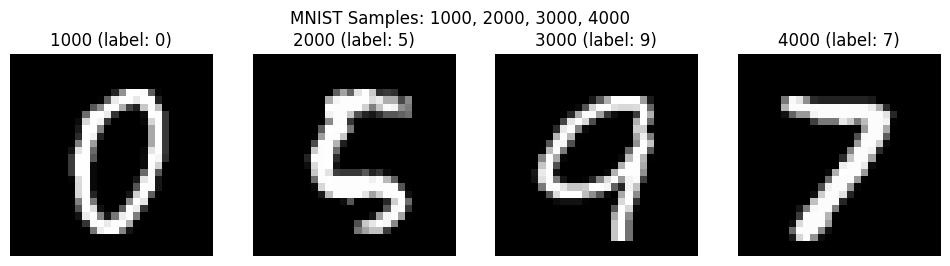


========== 과제 3 ==========

=== Model Summary: Hidden Layer = 128 (기존 256에서 변경) ===


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)


========== 과제 4 ==========

=== SGD Optimizer로 모델 컴파일 중 ===
SGD Optimizer로 컴파일 완료.

========== 과제 5 ==========

=== epochs=2 학습 시작 ===
Epoch 1/2
1875/1875 - 7s - 4ms/step - accuracy: 0.9251 - loss: 0.2625
Epoch 2/2
1875/1875 - 5s - 3ms/step - accuracy: 0.9665 - loss: 0.1147
테스트 정확도 (epochs=2): 0.9720

=== epochs=5 학습 시작 ===
Epoch 1/5
1875/1875 - 7s - 3ms/step - accuracy: 0.9265 - loss: 0.2592
Epoch 2/5
1875/1875 - 7s - 4ms/step - accuracy: 0.9671 - loss: 0.1118
Epoch 3/5
1875/1875 - 6s - 3ms/step - accuracy: 0.9765 - loss: 0.0774
Epoch 4/5
1875/1875 - 6s - 3ms/step - accuracy: 0.9816 - loss: 0.0585
Epoch 5/5
1875/1875 - 6s - 3ms/step - accuracy: 0.9864 - loss: 0.0442
테스트 정확도 (epochs=5): 0.9781

=== 최종 정확도 비교 ===
Epoch 2 Accuracy : 0.9720
Epoch 5 Accuracy : 0.9781

=== 정확도가 다른 이유 ===
Epoch이 많을수록 학습 기회가 늘어나기 때문에(=더 많은 훈련),
일반적으로 epoch=5가 epoch=2보다 정확도가 더 높습니다.
epoch=2는 아직 충분히 학습되지 않아 정확도가 낮게 나타납니다.

========== 모든 과제 완료 ==========


In [2]:
#   Name: chenyujie
#   Student ID: 50250283
#   설명:
#   이 파일은 PPT에서 요구한 5개의 과제를 모두 포함하고 있으며,
#   MNIST 이미지 출력, 모델 수정, Optimizer 변경,
#   Epoch 비교 실험을 수행합니다.

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

#                 MNIST 데이터 불러오기 및 전처리

mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 정규화 (0~1 범위)
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0


# 과제 1: train_image[6000] 출력

def show_single_image(index=6000):
    """
    단일 MNIST 이미지를 출력하는 함수.
    PPT 내용: 단일 이미지 출력 예시 부분.
    """
    print(f"train_image[{index}] 출력 중...")
    plt.imshow(train_images[index], cmap='gray')
    plt.title(f"Label = {train_labels[index]}")
    plt.axis('off')
    plt.show()


# 과제 2: 4개의 이미지 출력 (1000, 2000, 3000, 4000)

def show_multiple_images(indices=[1000, 2000, 3000, 4000]):
    """
    4개의 MNIST 이미지를 가로로 출력하는 함수.
    PPT 내용: 여러 이미지 시각화.
    """
    fig, axes = plt.subplots(1, 4, figsize=(12, 3))

    for ax, i in zip(axes, indices):
        ax.imshow(train_images[i], cmap="gray")
        ax.set_title(f"{i} (label: {train_labels[i]})")
        ax.axis("off")

    plt.suptitle("MNIST Samples: 1000, 2000, 3000, 4000")
    plt.show()


# 과제 3: 은닉층 노드 수 256 → 128 변경 후 model.summary() 출력

def build_model_with_128():
    """
    은닉층(Dense) 노드를 256에서 128로 변경한 모델을 생성.
    PPT 내용: Dense(256) → Dense(128) 변경 실습.
    """
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation="relu"),  # ← 변경된 은닉층 노드
        keras.layers.Dense(10, activation="softmax")
    ])

    print("\n=== Model Summary: Hidden Layer = 128 (기존 256에서 변경) ===")
    model.summary()
    return model


# 과제 4: Adam → SGD Optimizer 변경하여 컴파일

def compile_model_with_sgd():
    """
    최적화 함수를 Adam → SGD로 변경하여 모델 컴파일.
    PPT 내용: optimizers.Adam() → optimizers.SGD()
    """
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dense(10, activation="softmax")
    ])

    print("\n=== SGD Optimizer로 모델 컴파일 중 ===")
    model.compile(
        optimizer=keras.optimizers.SGD(),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    print("SGD Optimizer로 컴파일 완료.")
    return model


# 과제 5: epochs=2 vs epochs=5 정확도 비교

def compare_epochs():
    """
    epochs=2 와 epochs=5 학습 후 정확도를 비교.
    PPT 내용: metrics=['accuracy'] 사용한 정확도 비교 실험.
    """

    def train_model(epochs):
        model = keras.Sequential([
            keras.layers.Flatten(input_shape=(28, 28)),
            keras.layers.Dense(128, activation="relu"),
            keras.layers.Dense(10, activation="softmax")
        ])
        model.compile(
            optimizer="adam",
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"]
        )
        print(f"\n=== epochs={epochs} 학습 시작 ===")
        model.fit(train_images, train_labels, epochs=epochs, verbose=2)

        loss, acc = model.evaluate(test_images, test_labels, verbose=0)
        print(f"테스트 정확도 (epochs={epochs}): {acc:.4f}")
        return acc

    acc2 = train_model(2)
    acc5 = train_model(5)

    print("\n=== 최종 정확도 비교 ===")
    print(f"Epoch 2 Accuracy : {acc2:.4f}")
    print(f"Epoch 5 Accuracy : {acc5:.4f}")

    print("\n=== 정확도가 다른 이유 ===")
    print("Epoch이 많을수록 학습 기회가 늘어나기 때문에(=더 많은 훈련),")
    print("일반적으로 epoch=5가 epoch=2보다 정확도가 더 높습니다.")
    print("epoch=2는 아직 충분히 학습되지 않아 정확도가 낮게 나타납니다.")

#                   Main – 과제 전체 실행

if __name__ == "__main__":

    print("\n========== 과제 1 ==========")
    show_single_image()

    print("\n========== 과제 2 ==========")
    show_multiple_images()

    print("\n========== 과제 3 ==========")
    build_model_with_128()

    print("\n========== 과제 4 ==========")
    compile_model_with_sgd()

    print("\n========== 과제 5 ==========")
    compare_epochs()

    print("\n========== 모든 과제 완료 ==========")
